In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('calidad_de_leche_vaca.csv')
df.head()

,N°,Provincia,Rep.,Densidad,Punto_crioscópico,Proteína,Lactosa,Materia_grasa,Sólidos_totales,Bacterias_aerobias_mesófilas,Coliformes_totales
0,1,1,1,1.029,-0.56,3.2,4.8,3.9,11.9,2.49,2.48
1,2,1,2,1.032,-0.62,3.5,4.9,4.5,12.9,2.51,2.30
2,3,1,3,1.015,-0.30,2.7,4.1,3.7,10.5,2.50,2.30
3,4,1,4,1.021,-0.42,2.4,4.1,4.9,11.4,2.53,3.41
4,5,1,5,1.021,-0.42,2.4,4.1,4.9,11.4,3.08,2.30


### Eliminar las Columnas 'N°' y 'Rep.'

In [33]:
# Eliminar las columnas 'N°' y 'Rep.'
df.drop(['N°', 'Rep.'], axis=1, inplace=True)
df.head()

,Provincia,Densidad,Punto_crioscópico,Proteína,Lactosa,Materia_grasa,Sólidos_totales,Bacterias_aerobias_mesófilas,Coliformes_totales
0,1,1.029,-0.56,3.2,4.8,3.9,11.9,2.49,2.48
1,1,1.032,-0.62,3.5,4.9,4.5,12.9,2.51,2.30
2,1,1.015,-0.30,2.7,4.1,3.7,10.5,2.50,2.30
3,1,1.021,-0.42,2.4,4.1,4.9,11.4,2.53,3.41
4,1,1.021,-0.42,2.4,4.1,4.9,11.4,3.08,2.30


## Reemplazar los Códigos de Provincia por Nombres
Creamos un diccionario para mapear los códigos numéricos a los nombres de las provincias y aplicamos el mapeo.

In [34]:
# Crear un diccionario de mapeo
provincia_mapping = {
    1: 'Azángaro',
    2: 'Melgar',
    3: 'Huancané',
    4: 'Puno',
    5: 'Lampa',
    6: 'San Román'
}

# Reemplazar los códigos en la columna 'Provincia'
df['Provincia'] = df['Provincia'].map(provincia_mapping)

In [35]:
df

,Provincia,Densidad,Punto_crioscópico,Proteína,Lactosa,Materia_grasa,Sólidos_totales,Bacterias_aerobias_mesófilas,Coliformes_totales
0,Azángaro,1.029,-0.560,3.2,4.8,3.9,11.9,2.49,2.48
1,Azángaro,1.032,-0.620,3.5,4.9,4.5,12.9,2.51,2.30
2,Azángaro,1.015,-0.300,2.7,4.1,3.7,10.5,2.50,2.30
3,Azángaro,1.021,-0.420,2.4,4.1,4.9,11.4,2.53,3.41
4,Azángaro,1.021,-0.420,2.4,4.1,4.9,11.4,3.08,2.30
...,...,...,...,...,...,...,...,...,...
505,San Román,1.027,-0.506,2.9,4.3,3.9,11.1,4.22,4.80
506,San Román,1.025,-0.551,3.0,4.5,7.5,15.0,4.21,4.90
507,San Román,1.030,-0.589,3.3,5.0,4.3,12.6,4.63,4.93
508,San Román,1.026,-0.497,2.8,4.3,3.6,10.7,4.85,4.68


## Verificar Valores Nulos

In [36]:
# Verificar si existen valores nulos
print(df.isnull().sum())


Provincia                       0
Densidad                        0
Punto_crioscópico               0
Proteína                        0
Lactosa                         0
Materia_grasa                   0
Sólidos_totales                 0
Bacterias_aerobias_mesófilas    0
Coliformes_totales              0
dtype: int64


## Convertir Columnas Numéricas al Tipo Adecuado
Nos aseguramos de que las columnas numéricas estén en el tipo de datos correcto.

In [37]:
# Lista de columnas numéricas
numeric_columns = ['Densidad', 'Punto_crioscópico', 'Proteína', 'Lactosa',
                   'Materia_grasa', 'Sólidos_totales', 'Bacterias_aerobias_mesófilas',
                   'Coliformes_totales']

# Convertir a tipo numérico
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verificar tipos de datos
print(df.dtypes)


Provincia                        object
Densidad                        float64
Punto_crioscópico               float64
Proteína                        float64
Lactosa                         float64
Materia_grasa                   float64
Sólidos_totales                 float64
Bacterias_aerobias_mesófilas    float64
Coliformes_totales              float64
dtype: object


## Verificar Datos Duplicados
Comprobamos si hay filas duplicadas y las eliminamos si es necesario.

In [38]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Número de filas duplicadas: 5


In [39]:
# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)
# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Número de filas duplicadas: 0


## Estadísticas Descriptivas
Calculamos las estadísticas descriptivas para comprender mejor los datos.

In [40]:
df.describe()

,Densidad,Punto_crioscópico,Proteína,Lactosa,Materia_grasa,Sólidos_totales,Bacterias_aerobias_mesófilas,Coliformes_totales
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1.029071,-0.551176,3.173861,4.685941,3.910495,11.770297,3.065644,3.780139
std,0.002515,0.047389,0.258410,0.376624,0.850787,1.039970,0.756516,0.924696
min,1.012000,-0.710000,2.200000,2.700000,1.100000,9.000000,1.000000,1.000000
25%,1.028000,-0.580000,3.000000,4.500000,3.400000,11.100000,2.540000,3.080000
50%,1.029000,-0.556000,3.200000,4.700000,3.900000,11.700000,3.180000,4.050000
75%,1.031000,-0.530000,3.300000,4.900000,4.500000,12.500000,3.630000,4.510000
max,1.038000,-0.159000,4.400000,5.900000,7.500000,15.000000,5.180000,5.270000


## Distribución de las Variables
Utilizamos histogramas para visualizar la distribución de las variables clave.

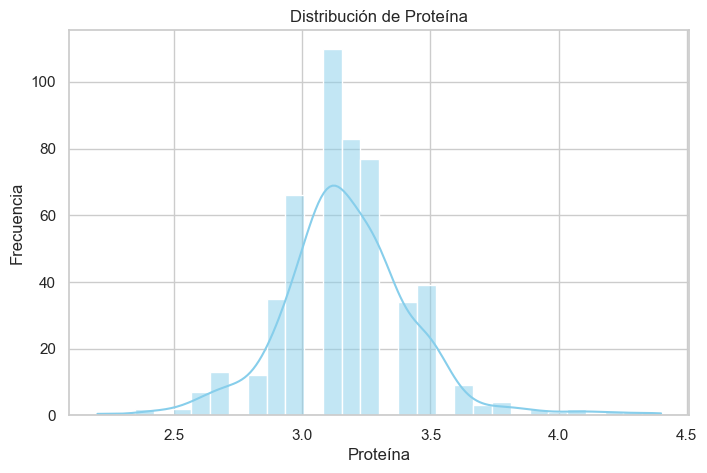

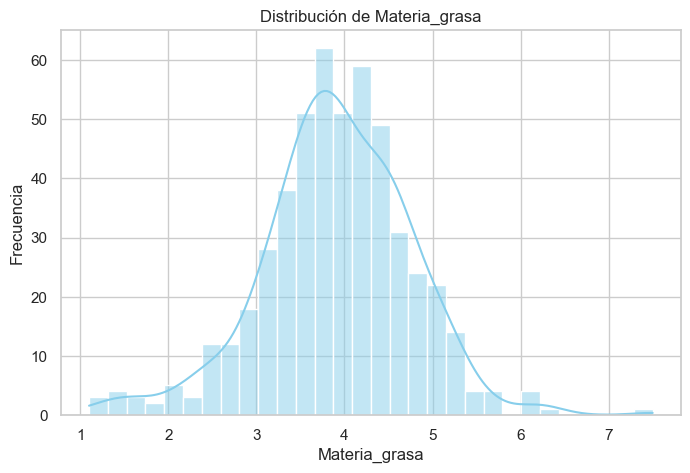

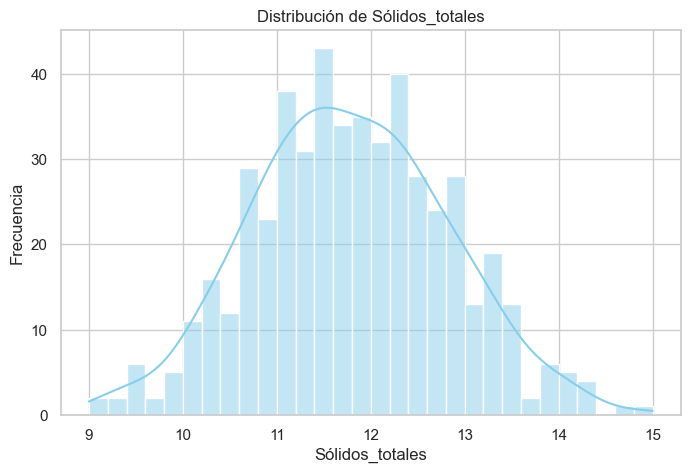

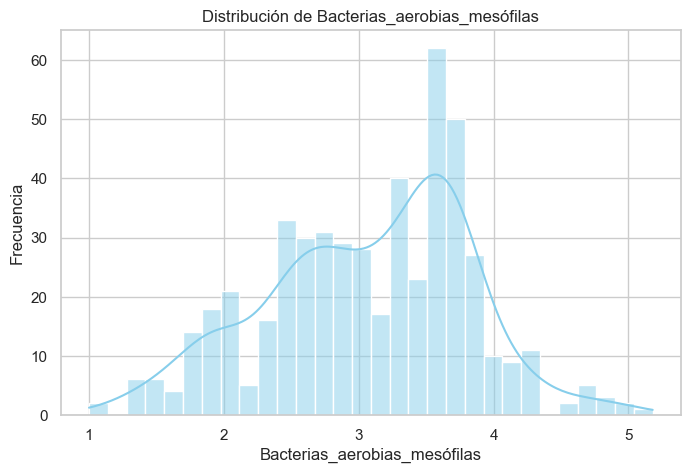

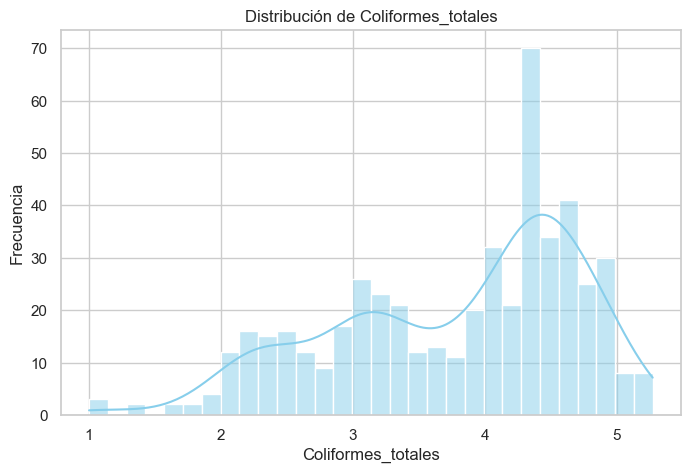

In [41]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Variables a graficar
variables = ['Proteína', 'Materia_grasa', 'Sólidos_totales', 'Bacterias_aerobias_mesófilas', 'Coliformes_totales']

# Crear histogramas
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


### Explicación:

- Proteína: La mayoría de las muestras tienen un contenido de proteína entre 2.9% y 3.3%.
- Materia Grasa: La distribución muestra una tendencia central alrededor del 3.8%.
- Sólidos Totales: La mayoría de las muestras se concentran entre 11% y 13%.
- Bacterias Aerobias Mesófilas y Coliformes Totales: Las distribuciones indican variabilidad en la calidad microbiológica.

## Relaciones entre Variables
Exploramos las relaciones entre variables utilizando diagramas de dispersión.

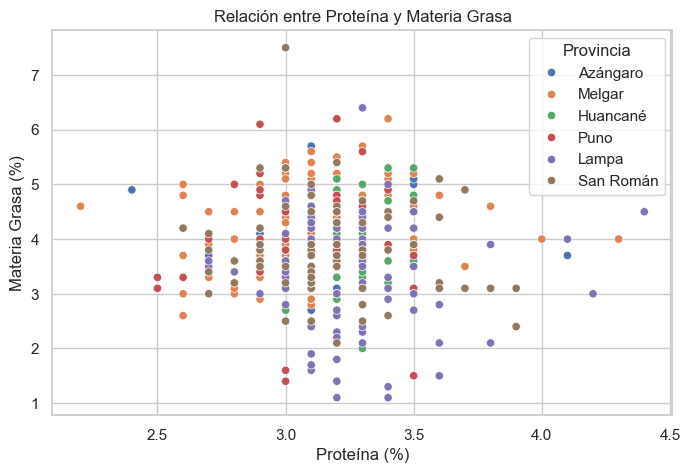

In [42]:
# Relación entre Proteína y Materia Grasa
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Proteína', y='Materia_grasa', hue='Provincia')
plt.title('Relación entre Proteína y Materia Grasa')
plt.xlabel('Proteína (%)')
plt.ylabel('Materia Grasa (%)')
plt.legend(title='Provincia')
plt.show()


### Interpretación:

- Existe una correlación positiva entre el contenido de proteína y materia grasa.
- Algunas provincias muestran tendencias específicas.

## Correlación de Variables
Calculamos la matriz de correlación y visualizamos con un mapa de calor.

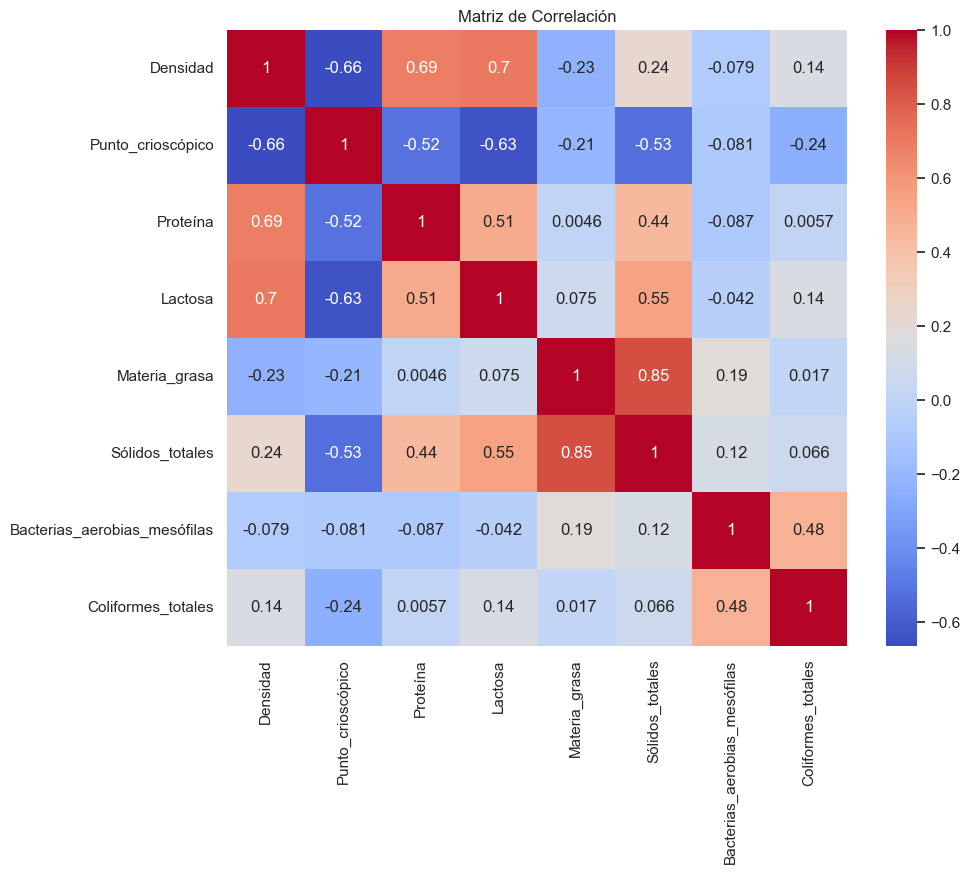

In [43]:
# Matriz de correlación
corr_matrix = df[numeric_columns].corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


### Observaciones:

- Proteína y Materia Grasa tienen una correlación positiva.
- Bacterias Aerobias Mesófilas y Coliformes Totales también están correlacionadas.

## Análisis por Provincia
Calculamos las estadísticas descriptivas por provincia.

In [44]:
# Estadísticas por provincia
provincia_stats = df.groupby('Provincia')[numeric_columns].mean()
provincia_stats


,Densidad,Punto_crioscópico,Proteína,Lactosa,Materia_grasa,Sólidos_totales,Bacterias_aerobias_mesófilas,Coliformes_totales
Provincia,,,,,,,,
Azángaro,1.028558,-0.547269,3.182692,4.588462,4.117308,11.888462,2.852500,3.267692
Huancané,1.030065,-0.577391,3.245652,4.876087,3.984783,12.106522,3.268043,4.351304
Lampa,1.030030,-0.546808,3.252525,4.734343,3.398990,11.385859,2.661313,3.717172
Melgar,1.028711,-0.553530,3.148193,4.701205,4.153012,12.002410,3.328072,3.735542
Puno,1.028200,-0.531357,3.068571,4.581429,3.962857,11.612857,2.673857,3.176286
San Román,1.029167,-0.557097,3.175000,4.634722,3.806944,11.616667,3.422083,4.561806


## Visualización de Comparaciones entre Provincias
Boxplot de Materia Grasa por Provincia

C:\Users\danie\AppData\Local\Temp\ipykernel_2304\327457017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Provincia', y='Materia_grasa', palette='Pastel1')


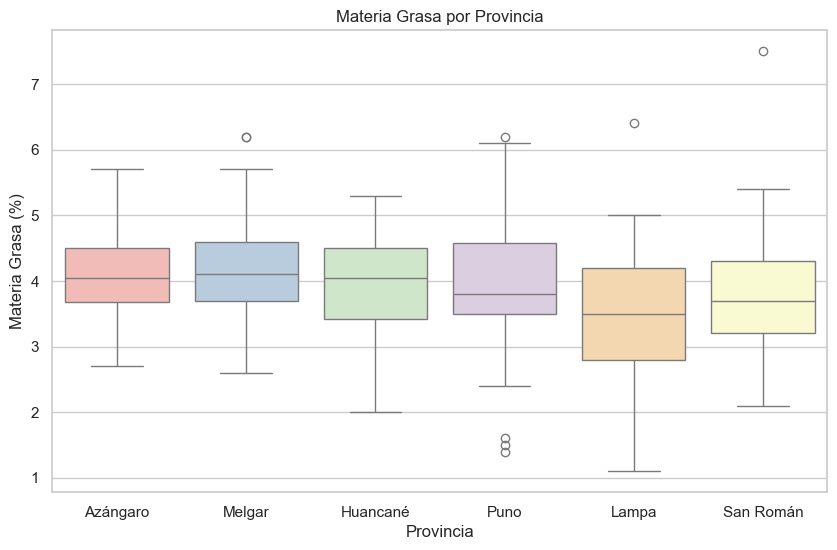

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Provincia', y='Materia_grasa', palette='Pastel1')
plt.title('Materia Grasa por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Materia Grasa (%)')
plt.show()


### Observaciones:

- Azángaro y Puno presentan valores más altos de materia grasa.
- Lampa muestra valores más bajos en comparación con otras provincias.

## Conteo de Coliformes Totales por Provincia

C:\Users\danie\AppData\Local\Temp\ipykernel_2304\567105982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Provincia', y='Coliformes_totales', estimator=lambda x: sum(x > 1000)/len(x)*100, palette='Set2')


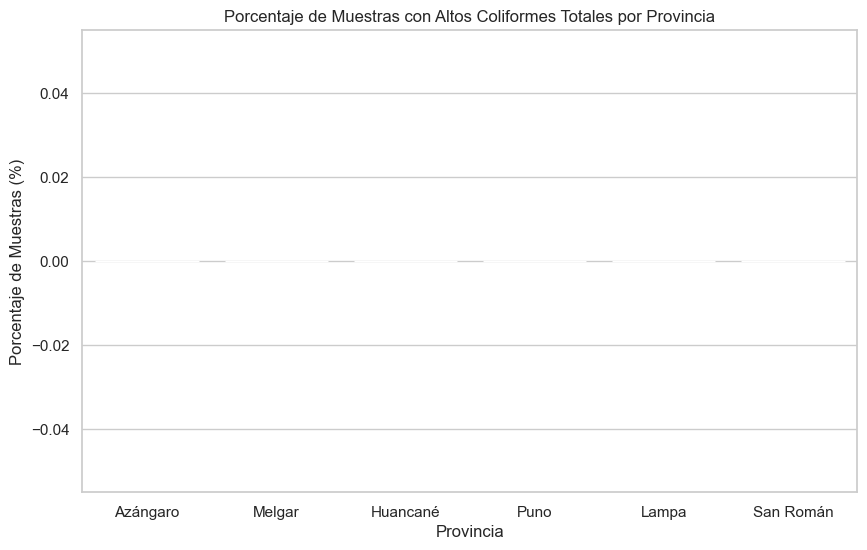

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Provincia', y='Coliformes_totales', estimator=lambda x: sum(x > 1000)/len(x)*100, palette='Set2')
plt.title('Porcentaje de Muestras con Altos Coliformes Totales por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje de Muestras (%)')
plt.show()

Nota: En este caso, estamos asumiendo que los valores superiores a 3 en log(UFC/mL) indican un conteo superior a 1000 UFC/mL.

### Interpretación:

- Huancané y San Román tienen un mayor porcentaje de muestras con altos niveles de coliformes totales.
- Puno presenta los niveles más bajos.

## Conclusiones del Análisis
- Calidad Fisicoquímica: La mayoría de las muestras cumplen con los parámetros establecidos para proteína y materia grasa.
- Calidad Microbiológica: Hay variabilidad en los niveles de bacterias mesófilas y coliformes totales, indicando diferencias en las prácticas de higiene entre provincias.
- Diferencias Regionales: Se observan diferencias significativas en la composición de la leche entre las diferentes provincias.